In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from matplotlib import rcParams as rc
from bigfile import BigFile
cmap = plt.get_cmap("Set2")
hubble = 0.6774
import seaborn as sns
from colossus.cosmology import cosmology
import glob

sns.set()
sns.set_palette("Set2")
sns.set_style('ticks',{'ytick.direction':'in','xtick.direction':'in'})
cmap = plt.get_cmap("Set2")
cmap2 = plt.get_cmap("Dark2")
sns.set_context("paper", font_scale=1.7,rc={"axes.linewidth": 1.3,"lines.linewidth": 2.5,"patch.linewidth": 2.2})

In [2]:
# some constants and unit conversions
msun_mks = 1.989e30
msun_cgs = msun_mks * 1e3
pc_mks = 3.086e16
grav_mks = 6.67e-11
km_mks = 1e3
yr_mks = 3.154e+7
c_mks = 3e8

Mpc_to_m = 3.086e+22
m_to_Mpc = 1./Mpc_to_m
s_to_year = 3.17098e-8
c_Mpc_yr = c_mks*m_to_Mpc/s_to_year

hh = 0.6774

In [3]:
def load_astrid_cosmo():
    # set-up cosmology
    params = {'flat': True, 'H0': 67.74, 'Om0': 0.3089, 'Ob0': 0.0486, 'sigma8': 0.82, 'ns': 0.96}
    cosmo = cosmology.setCosmology('myCosmo', params)

    return cosmo

cosmo = load_astrid_cosmo()

In [4]:
mdir = "/jet/home/nianyic/scratch1/Astrid/bhdetails-chopped/mergers"
mergers = []
for ff in sorted(glob.glob(mdir + "/*")):
    mergers.append(np.load(ff))
mergers = np.concatenate(mergers)
print(len(mergers))

swid = np.minimum(mergers["ID1"], mergers["ID2"])
_, uidx = np.unique(swid, return_index=True)


mergers = mergers[uidx]
print(f"Unique mergers {len(mergers)}")

538640
Unique mergers 518951


[1.09230769 1.10769231 1.12307692 1.13846154 1.15384615 1.16923077
 1.18461538 1.2        1.21538462 1.23076923 1.24615385 1.26153846
 1.27692308 1.29230769]


Text(0.5, 1.0, 'Merger Rate')

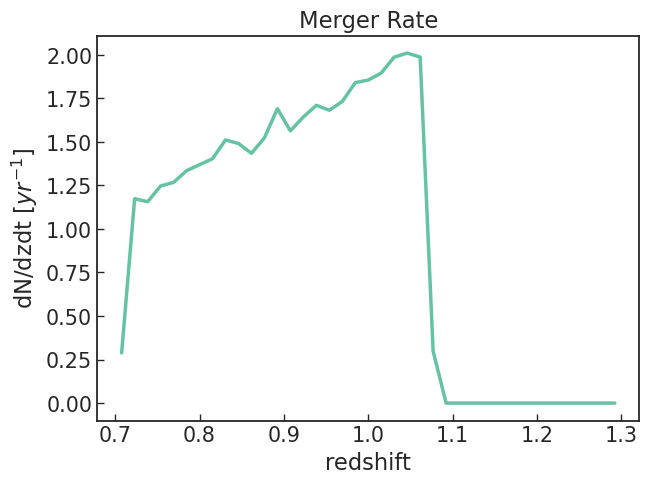

In [5]:

vsim = 250**3
zbin = np.linspace(0.7,1.3,40)
dz = zbin[1:] - zbin[:-1]
zc1 = 0.5*(zbin[1:]+zbin[:-1])
rc1 = np.array([cosmo.comovingDistance(0.,zz) for zz in zc1])

n0,e0 = np.histogram(np.concatenate([mergers['z']]),bins=zbin)

rate1 = n0/dz/vsim*4*np.pi*rc1**2*c_Mpc_yr


fig, ax = plt.subplots(1, 1, figsize=(7,5))
# ax.plot(zc, rate0)
ax.plot(zc1, rate1)

print(zc1[rate1 == 0])
ax.set(xlabel="redshift", ylabel=r"dN/dzdt [$yr^{-1}$]")
# plt.yscale('log')
ax.set_title("Merger Rate")

